In [1]:
using Statistics
using DelimitedFiles
using Plots
using LaTeXStrings
using LinearAlgebra
using LsqFit
using Test

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
using StatsBase

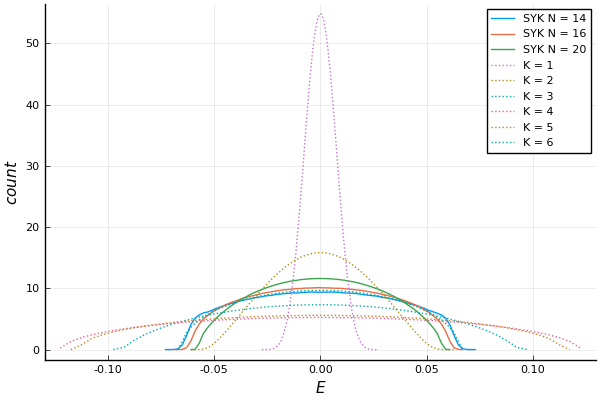

In [4]:
N = [14, 16, 20]
matrix_size = Int.(2 .^ (N ./2))
it_num = [78125, 39063, 9766]
plot()
for i in 1:3
    file_fd = string("eig_saves/EIG_SYK_N", N[i], "_it", it_num[i], ".dat")
    fd1 = readdlm(file_fd);
    fd1 = reshape(fd1, matrix_size[i]*it_num[i]) ./ N[i];
    h = fit(Histogram, fd1, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = N[i]
    plot!(x, h.weights, label = "SYK N = $N_i")
end
ylabel!(L"count")
xlabel!(L"E")

K = [1, 2, 3, 4, 5, 6]
N = 6
L = 12
matrix_size = binomial(12, 6)
it_num = 11_000
for i in 1:6
    file_fd = string("eig_saves/All_Meml", L, "_", N, "_", K[i], ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape(fd1, matrix_size*it_num) ./ matrix_size;
    h = fit(Histogram, fd2, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = K[i]
    plot!(x, h.weights, label = "K = $N_i", ls = :dot)
end
ylabel!(L"count")
xlabel!(L"E")

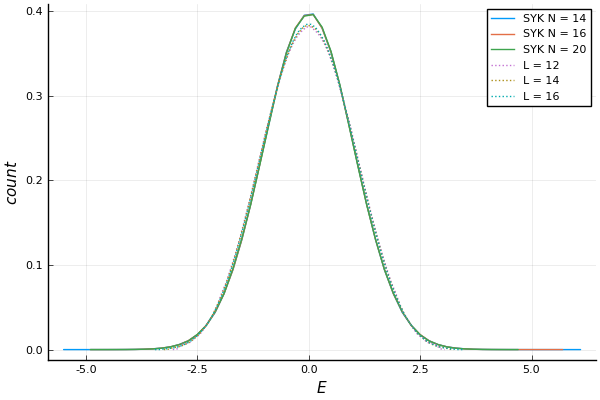

In [5]:
N = [14, 16, 20]
matrix_size = Int.(2 .^ (N ./2))
it_num = [78125, 39063, 9766]
plot()
for i in 1:3
    file_fd = string("eig_saves/EIG_SYK_N", N[i], "_it", it_num[i], ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape((fd1 .- mean(fd1, dims = 2)) ./ std(fd1, dims = 2), matrix_size[i]*it_num[i]);
    h = fit(Histogram, fd2, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = N[i]
    plot!(x, h.weights, label = "SYK N = $N_i")
end
ylabel!(L"count")
xlabel!(L"E")

K = 1
N = 6
L = [12, 14, 16]
matrix_size = binomial.(L, 6)
it_num = [11_000, 3400, 1250]
for i in 1:3
    file_fd = string("eig_saves/All_Meml", L[i], "_", N, "_", K, ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape((fd1 .- mean(fd1, dims = 2)) ./ std(fd1, dims = 2), matrix_size[i]*it_num[i]);
    h = fit(Histogram, fd2, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = L[i]
    plot!(x, h.weights, label = "L = $N_i", ls = :dot)
end
ylabel!(L"count")
xlabel!(L"E")

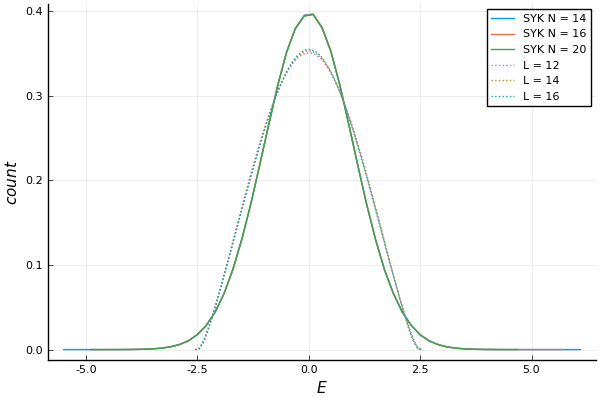

In [6]:
N = [14, 16, 20]
matrix_size = Int.(2 .^ (N ./2))
it_num = [78125, 39063, 9766]
plot()
for i in 1:3
    file_fd = string("eig_saves/EIG_SYK_N", N[i], "_it", it_num[i], ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape((fd1 .- mean(fd1, dims = 2)) ./ std(fd1, dims = 2), matrix_size[i]*it_num[i]);
    h = fit(Histogram, fd2, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = N[i]
    plot!(x, h.weights, label = "SYK N = $N_i")
end
ylabel!(L"count")
xlabel!(L"E")

K = 2
N = 6
L = [12, 14, 16]
matrix_size = binomial.(L, 6)
it_num = [11_000, 3400, 1250]
for i in 1:3
    file_fd = string("eig_saves/All_Meml", L[i], "_", N, "_", K, ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape((fd1 .- mean(fd1, dims = 2)) ./ std(fd1, dims = 2), matrix_size[i]*it_num[i]);
    h = fit(Histogram, fd2, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = L[i]
    plot!(x, h.weights, label = "L = $N_i", ls = :dot)
end
ylabel!(L"count")
xlabel!(L"E")

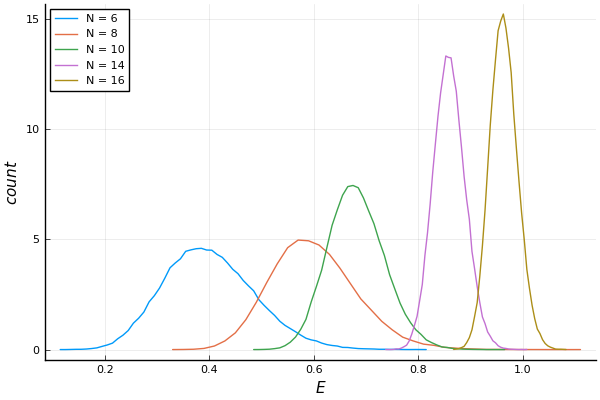

In [7]:
it_num = 100_000
plot()
for N in [6, 8, 10, 14, 16]
    file_fd = string("eig_saves/EIGmax_SYK_N", N, ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape(fd1, it_num);
    h = fit(Histogram, fd2, nbins=70)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    plot!(x, h.weights, label = "N = $N")
end
ylabel!(L"count")
xlabel!(L"E")

In [30]:
it_num = 100_000
m_array = zeros(Float64, 5)
s_array = zeros(Float64, 5)
N_array = [6, 8, 10, 14, 16]
for i in 1:5
    file_fd = string("eig_saves/EIGmax_SYK_N", N_array[i], ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape(fd1, it_num);
    m_array[i] = mean(fd2)
    s_array[i] = std(fd2)
end

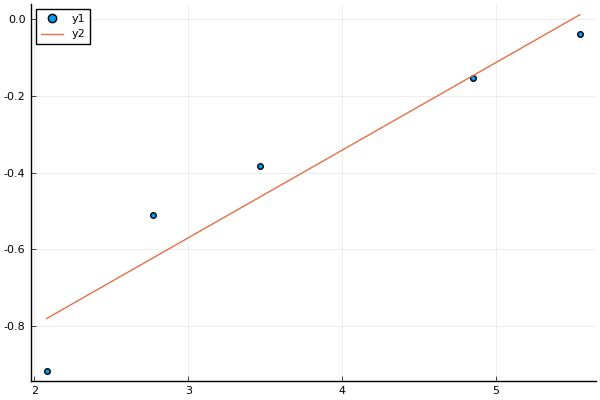

In [31]:
@. modelLin(x, p) = p[1] + p[2]*x
fitmean = curve_fit(modelLin, log.(2 .^ (N_array ./ 2)), log.(m_array), [1.0, 1.0])
fit_coefmean = coef(fitmean);
scatter(log.(2 .^ (N_array ./ 2)), log.(m_array))
plot!(log.(2 .^ (N_array ./ 2)), 
        fit_coefmean[1] .+ fit_coefmean[2] .* log.(2 .^ (N_array ./ 2)))

In [32]:
fit_coefmean[2]

0.22861580298379502

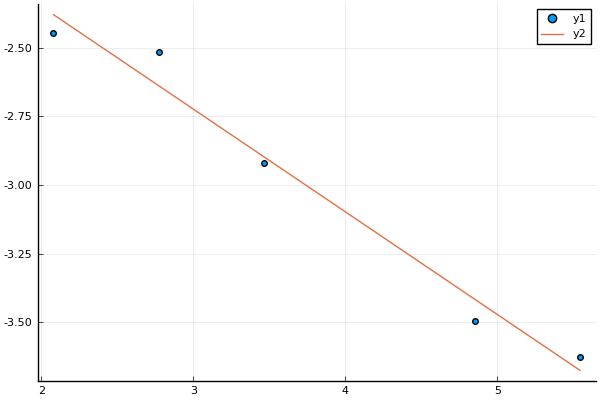

In [33]:
@. modelLin(x, p) = p[1] + p[2]*x
fitstd = curve_fit(modelLin, log.(2 .^ (N_array ./ 2)), log.(s_array), [1.0, 1.0])
fit_coefstd = coef(fitstd);
scatter(log.(2 .^ (N_array ./ 2)), log.(s_array))
plot!(log.(2 .^ (N_array ./ 2)), 
        fit_coefstd[1] .+ fit_coefstd[2] .* log.(2 .^ (N_array ./ 2)))

In [34]:
fit_coefstd[2]

-0.37437524491444

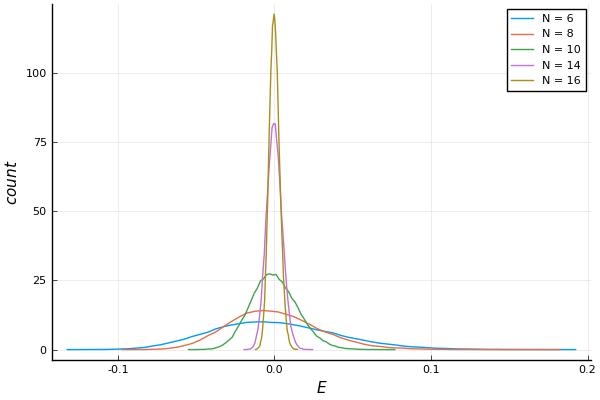

In [38]:
it_num = 100_000
plot()
for N in [6, 8, 10, 14, 16]
    file_fd = string("eig_saves/EIGmax_SYK_N", N, ".dat")
    fd1 = readdlm(file_fd);
    fd2 = reshape(fd1, it_num);
    fd2 = (fd2 .- mean(fd2)) .* ((2^(N/2))^fit_coefstd[2])
    h = fit(Histogram, fd2, nbins=70)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    plot!(x, h.weights, label = "N = $N")
end
ylabel!(L"count")
xlabel!(L"E")